#  Preprocessing

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load the dataset
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#print the shape of dataset
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [ ]:
# Display first 10 rows
print("First 10 Rows:")
#i used transbose to make it easier to read
df.head(10).T

First 10 Rows:


,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes


In [ ]:
#display last 10 rows
print("Last 10 Rows: ")
#i used transbose to make it easier to read
df.tail(10).T

Last 10 Rows: 


,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,1,0
Partner,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,38,67,19,12,72,24,72,11,4,66
PhoneService,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [ ]:
# Display basic statistics
print("Basic statistics of numerical columns:")
df.describe()

Basic statistics of numerical columns:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#summary statistics for categorical (object) columns
df.describe(include='O').T
# I noticed blank space in Totalcharges column

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
# Identify rows with whitespace in TotalCharges
print("Rows with whitespace in TotalCharges:")
df[df['TotalCharges'] == ' '].T

Rows with whitespace in TotalCharges:


,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


In [ ]:
# Convert TotalCharges to numeric, turning whitespace into NaN
# i coverted totalcharges to numeric and turned whitespaces into NAN so when i use df.isnull().sum() i can see the number of missing data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Verify conversion for specific rows
print("Verification of TotalCharges conversion:")
df.iloc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], :].T

Verification of TotalCharges conversion:


,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


In [ ]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


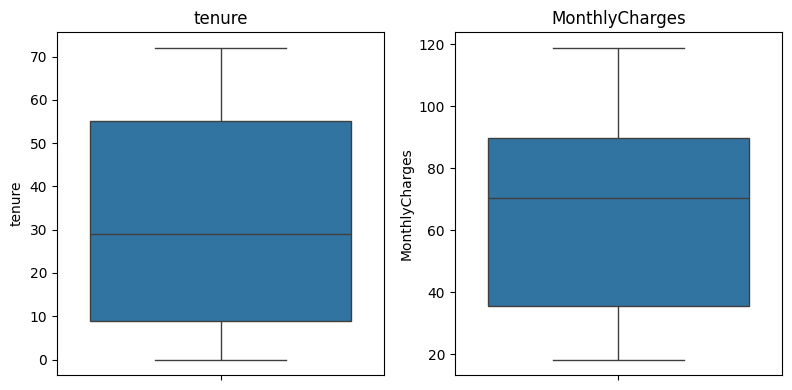

In [ ]:
# Visualize numerical features to check for outliers
plt.figure(figsize=(12, 4))
for i, col in enumerate(['tenure', 'MonthlyCharges']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

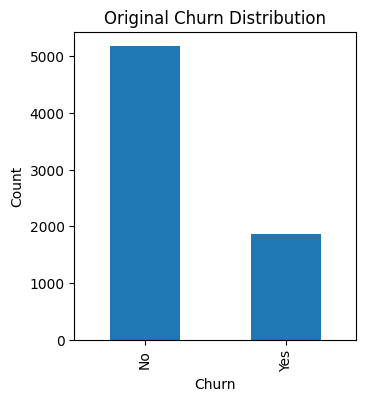

In [ ]:
# Visualize class (Churn) distribution before balancing
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(kind='bar', title='Original Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
# Data here imbalanced i will handle it later

In [ ]:
#Handle missing values handle missing data with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-14-c7d0957df782>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
#make sure it worked
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


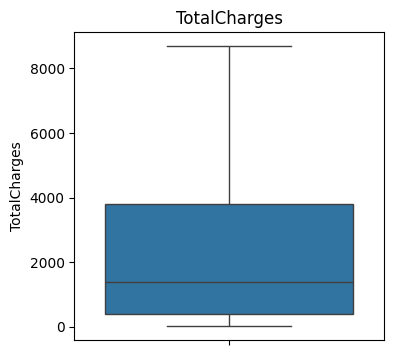

In [ ]:
# Visualize TotalCharges after conversion
plt.figure(figsize=(4, 4))
sns.boxplot(y=df['TotalCharges'])
plt.title('TotalCharges')
plt.show()

In [ ]:
# Standardize column names (first letter uppercase, rest lowercase)
df.columns = df.columns.str.lower().str.capitalize()
print("Column names after standardization:", df.columns)

Column names after standardization: Index(['Customerid', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')


In [ ]:
#drop customer id because it doesn't have effect here
df.drop('Customerid', axis=1, inplace=True)
#check if it worked
df.columns

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
       'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
       'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod',
       'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

In [ ]:
# One-hot encode categorical columns
categorical_cols = ['Gender', 'Partner', 'Dependents', 'Phoneservice', 'Multiplelines',
                    'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection',
                    'Techsupport', 'Streamingtv', 'Streamingmovies', 'Contract',
                    'Paperlessbilling', 'Paymentmethod']
#create dummy/indicator variables for each category in the columns
# df.drop('Churn', axis=1)Ensures encoding only the specified categorical columns, and excludes the target column Churn from the encoding.

df_encoded = pd.get_dummies(df.drop('Churn', axis=1)[categorical_cols], drop_first=True)
df_encoded = pd.concat([df[['Seniorcitizen', 'Tenure', 'Monthlycharges', 'Totalcharges']], df_encoded], axis=1)
print("Encoded DataFrame columns:", df_encoded.columns)
print("Encoded DataFrame info:")
df_encoded.info()

Encoded DataFrame columns: Index(['Seniorcitizen', 'Tenure', 'Monthlycharges', 'Totalcharges',
       'Gender_Male', 'Partner_Yes', 'Dependents_Yes', 'Phoneservice_Yes',
       'Multiplelines_No phone service', 'Multiplelines_Yes',
       'Internetservice_Fiber optic', 'Internetservice_No',
       'Onlinesecurity_No internet service', 'Onlinesecurity_Yes',
       'Onlinebackup_No internet service', 'Onlinebackup_Yes',
       'Deviceprotection_No internet service', 'Deviceprotection_Yes',
       'Techsupport_No internet service', 'Techsupport_Yes',
       'Streamingtv_No internet service', 'Streamingtv_Yes',
       'Streamingmovies_No internet service', 'Streamingmovies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperlessbilling_Yes',
       'Paymentmethod_Credit card (automatic)',
       'Paymentmethod_Electronic check', 'Paymentmethod_Mailed check'],
      dtype='object')
Encoded DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Dat

In [ ]:
#convert churn to int values
df.Churn=(df.Churn == 'Yes').astype(int)

In [ ]:
#check Churn column
df.Churn

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
# Prepare features and target
X = df_encoded
y = df['Churn']

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df.Churn.value_counts()
#Data here imbalanced

,count
Churn,
0,5174
1,1869


In [ ]:
# Handle class imbalance with RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

In [ ]:
# Create balanced DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Churn')], axis=1)
print("Balanced Churn value counts:")
print(df_balanced['Churn'].value_counts())
print('---------------------------------------')
print("Balanced Churn proportions:")
print(df_balanced['Churn'].value_counts(normalize=True))

Balanced Churn value counts:
Churn
0    5174
1    5174
Name: count, dtype: int64
---------------------------------------
Balanced Churn proportions:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


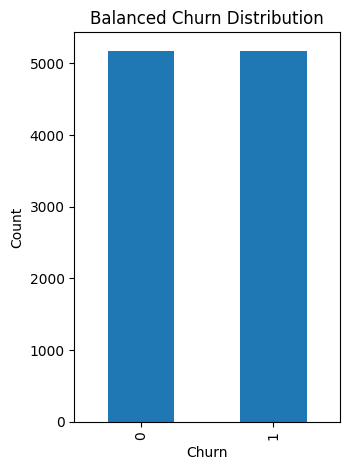

In [ ]:
# Visualize class distribution after balancing
plt.subplot(1, 2, 2)
df_balanced['Churn'].value_counts().plot(kind='bar', title='Balanced Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Split data into training and testing sets
X = df_balanced.drop('Churn', axis=1)
y = df_balanced['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(" Shapes of train/test sets:\n" ,X_train.shape, X_test.shape, y_train.shape, y_test.shape)

 Shapes of train/test sets:
 (7243, 30) (3105, 30) (7243,) (3105,)


#  Building the model

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Implement Random Forest Model
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

In [ ]:
# Train baseline Random Forest model and set hyperparameters
RF = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Require more samples to split
    min_samples_leaf=5,  # Require more samples at leaf nodes
    max_features='sqrt',  # Use square root of features at each split
    random_state=42 #Make sure random_state stay 42
)
RF.fit(X_train, y_train)
print("Model trained successfully!")
# Predict on training data
y_train_pred = RF.predict(X_train)

# Calculate and print training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
# Predict on training data
y_train_pred = RF.predict(X_train)

# Calculate and print F1 Score
train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
print(f"Training F1 Score: {train_f1:.2f}")

Model trained successfully!
Training Accuracy: 0.85
Training F1 Score: 0.86


In [ ]:
#Evaluate the model
# Predict
y_pred = RF.predict(X_test)
y_prob = RF.predict_proba(X_test)[:, 1]

# Metrics:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label=1)
# Calculate accuracy and F1-score
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test F1 Score: {f1:.2f}")
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the values
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Test Accuracy: 0.82
Test F1 Score: 0.83
Precision: 0.79
Recall: 0.88


Original Confusion Matrix:
 [[1311  263]
 [  79 1452]]


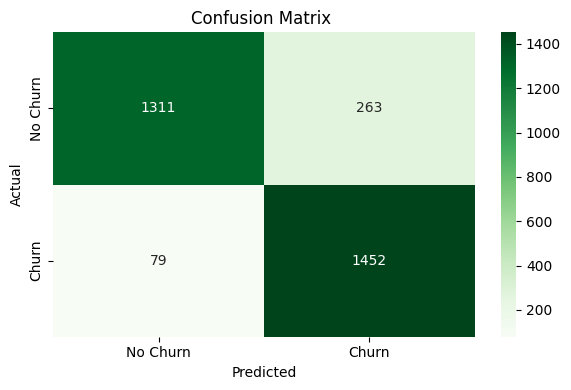

In [ ]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_original)
print("Original Confusion Matrix:\n", cm)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))

# Original model confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'],
            ax=ax)
ax.set_title('Confusion Matrix ')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

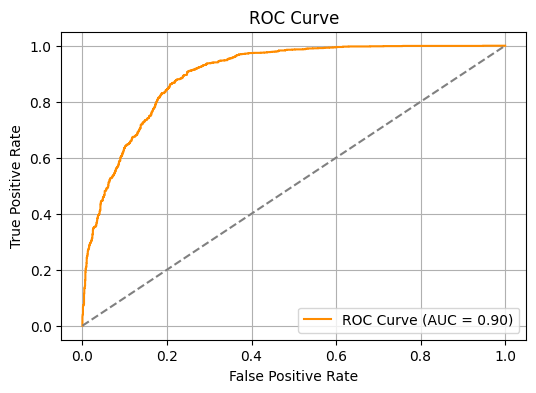

In [ ]:
# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

PR-AUC (Average Precision Score): 0.88


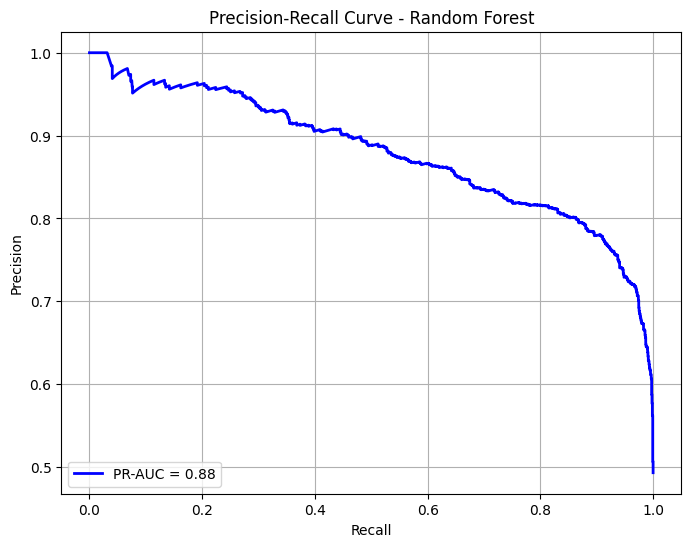

In [ ]:
#Here i'm going to compute and plot pr-Auc
#import nedded library
from sklearn.metrics import precision_recall_curve, average_precision_score
# Get the predicted probabilities for the positive class (churn=1)
y_scores = RF.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute the average precision score (equivalent to PR-AUC)
pr_auc = average_precision_score(y_test, y_scores)
print(f"PR-AUC (Average Precision Score): {pr_auc:.2f}")

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Fine-Tune

In [ ]:
# Define hyperparameter search space
param_space = {
    'n_estimators': Integer(50, 300),  # Number of trees
    'max_depth': Integer(5, 20),       # Maximum depth
    'min_samples_split': Integer(2, 10),# Minimum samples to split
    'min_samples_leaf': Integer(1, 10), # Minimum samples per leaf
    'max_features': Categorical(['sqrt', 'log2', None])  # Feature sampling
}

In [ ]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Set up BayesSearchCV to fine-tune the model
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=30,  # Number of parameter settings to sample
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
bayes_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = bayes_search.best_estimator_
print("Best Hyperparameters:", bayes_search.best_params_)
print(f"Best Cross-Validation Accuracy: {bayes_search.best_score_:.2f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
print("Best Hyperparameters:", bayes_search.best_params_)
print(f"Best Cross-Validation Accuracy: {bayes_search.best_score_:.2f}")

# Evaluate on test set
test_pred_tuned = best_model.predict(X_test)
test_accuracy_tuned = accuracy_score(y_test, test_pred_tuned)
test_f1_tuned = f1_score(y_test, test_pred_tuned)
test_prob_tuned = best_model.predict_proba(X_test)[:, 1]
test_roc_auc_tuned = roc_auc_score(y_test, test_prob_tuned)
precision_tuned = precision_score(y_test, test_pred_tuned)
recall_tuned = recall_score(y_test, test_pred_tuned)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, test_prob_tuned)
pr_auc_tuned = average_precision_score(y_test, test_prob_tuned)
# Print Tuned metrices
print("Fine-Tuned Model Test Performance:")
print(f"Test Accuracy: {test_accuracy_tuned:.2f}")
print(f"Test F1 Score: {test_f1_tuned:.2f}")
print(f"Test ROC AUC: {test_roc_auc_tuned:.2f}")
print(f"Precision for Fine-Tuned Model: {precision_tuned:.2f}")
print(f"Recall for Fine-Tuned Model: {recall_tuned:.2f}")
print(f"Fine-Tuned Model PR-AUC: {pr_auc_tuned:.2f}")

Best Hyperparameters: OrderedDict([('max_depth', 20), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 59)])
Best Cross-Validation Accuracy: 0.86
Fine-Tuned Model Test Performance:
Test Accuracy: 0.89
Test F1 Score: 0.89
Test ROC AUC: 0.96
Precision for Fine-Tuned Model: 0.85
Recall for Fine-Tuned Model: 0.95
Fine-Tuned Model PR-AUC: 0.96


Tuned Confusion Matrix:
 [[1313  261]
 [  84 1447]]


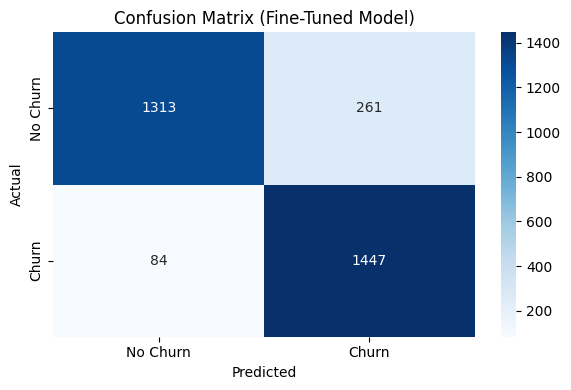

In [ ]:
# Predict using the tuned model
y_pred_tuned = bayes_search.best_estimator_.predict(X_test)
# Compute Tuned Confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Tuned Confusion Matrix:\n", cm_tuned)
# Tuned model confusion matrix
fig, ax = plt.subplots( figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'],
            ax=ax)
ax.set_title('Confusion Matrix (Fine-Tuned Model)')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

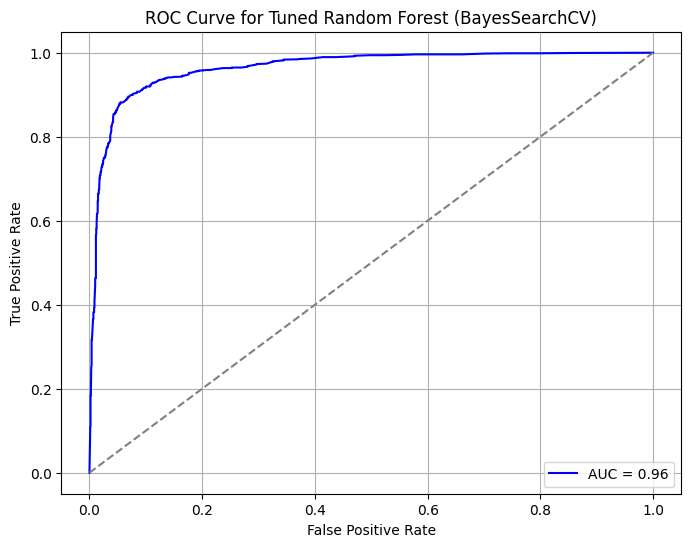

In [ ]:
# Predict probabilities using the best estimator from BayesSearchCV
y_proba = bayes_search.best_estimator_.predict_proba(X_test)[:, 1]

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest (BayesSearchCV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


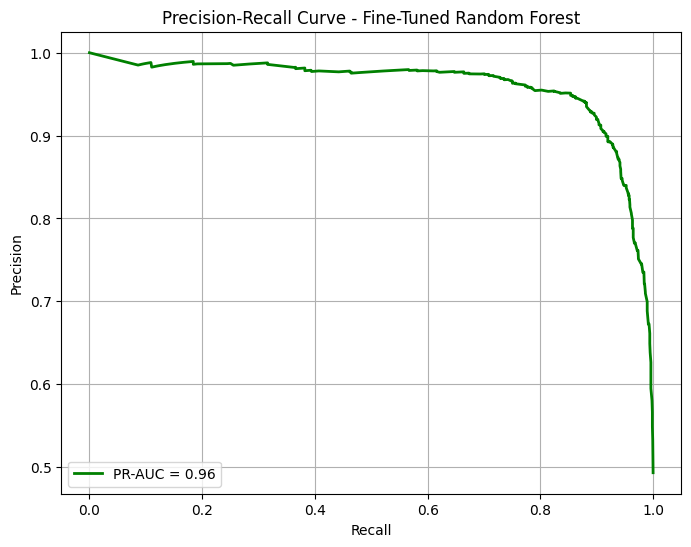

In [ ]:
# Plot tuned Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='green', lw=2, label=f'PR-AUC = {pr_auc_tuned:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Fine-Tuned Random Forest')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Compare between Original & Tuned model

In [ ]:
# Predict using the tuned model
y_pred_tuned = bayes_search.best_estimator_.predict(X_test)

In [ ]:
# Original model metrics
original_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_prob),
    "PR-AUC": pr_auc
}

# Tuned model metrics
tuned_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_tuned),
    "Precision": precision_score(y_test, y_pred_tuned),
    "Recall": recall_score(y_test, y_pred_tuned),
    "F1 Score": f1_score(y_test, y_pred_tuned),
    "ROC AUC": roc_auc_score(y_test, y_proba),
    "PR-AUC": pr_auc_tuned



}

# Print results
print("Original Model Metrics:")
for k, v in original_metrics.items():
    print(f"{k}: {v:.2f}")
print('-------------------------------')
print("\nTuned Model Metrics:")
for k, v in tuned_metrics.items():
    print(f"{k}: {v:.2f}")

Original Model Metrics:
Accuracy: 0.82
Precision: 0.79
Recall: 0.88
F1 Score: 0.83
ROC AUC: 0.90
PR-AUC: 0.88
-------------------------------

Tuned Model Metrics:
Accuracy: 0.89
Precision: 0.85
Recall: 0.95
F1 Score: 0.89
ROC AUC: 0.96
PR-AUC: 0.96


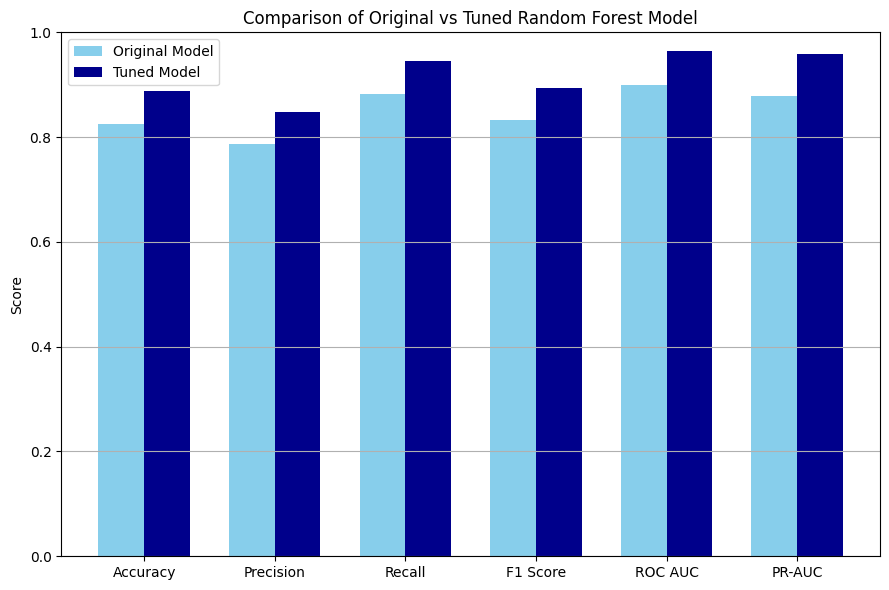

In [ ]:
#plot the comparison

labels = list(original_metrics.keys())
original_values = list(original_metrics.values())
tuned_values = list(tuned_metrics.values())

x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(9, 6))
plt.bar(x, original_values, width=bar_width, label='Original Model', color='skyblue')
plt.bar([p + bar_width for p in x], tuned_values, width=bar_width, label='Tuned Model', color='darkblue')

plt.xticks([p + bar_width / 2 for p in x], labels)
plt.ylabel('Score')
plt.title('Comparison of Original vs Tuned Random Forest Model')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()